In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB


In [8]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [9]:
1# ガウシアン分布でモデルを作る
model = GaussianNB()

In [10]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [22]:
model.fit(X_train, Y_train)

GaussianNB()

In [23]:
predict = model.predict(X_test)
predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [24]:
metrics.accuracy_score(Y_test, predict)

1.0

## Sec85 決定木とランダムフォレスト


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
# ダミーデータを作る
from sklearn.datasets import make_blobs

In [29]:
# center:中心点 random_state:乱数の固定 cluster_std:ばらつき
X, y = make_blobs(n_samples=500, centers = 4, random_state= 8, cluster_std=2.4)

In [39]:
y

array([1, 2, 2, 1, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 3, 3, 2, 0, 3,
       3, 2, 3, 3, 3, 1, 2, 0, 2, 3, 3, 2, 1, 0, 3, 0, 2, 1, 2, 1, 0, 3,
       1, 3, 0, 0, 0, 2, 1, 3, 1, 0, 0, 3, 2, 0, 2, 3, 0, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 0, 3, 1, 2, 0, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 3, 0, 3,
       0, 3, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1, 3, 1,
       2, 1, 3, 1, 1, 3, 3, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 2, 1, 2, 3, 3,
       2, 0, 3, 2, 3, 3, 1, 0, 2, 3, 2, 0, 0, 3, 0, 1, 3, 2, 0, 0, 0, 2,
       3, 3, 0, 1, 2, 3, 2, 0, 1, 1, 1, 1, 0, 1, 3, 2, 2, 1, 2, 1, 3, 3,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 3, 3, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 0, 2, 0, 1, 2, 3, 0, 1, 3, 2, 0, 1, 3, 3, 1, 3, 2, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 3, 2, 1, 2, 2, 1, 0, 1, 2, 3, 3, 0, 2,
       2, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 1, 0, 3, 3, 0, 1, 2, 0, 0, 0, 2,
       3, 2, 1, 0, 3, 3, 2, 3, 1, 0, 0, 3, 3, 0, 3,

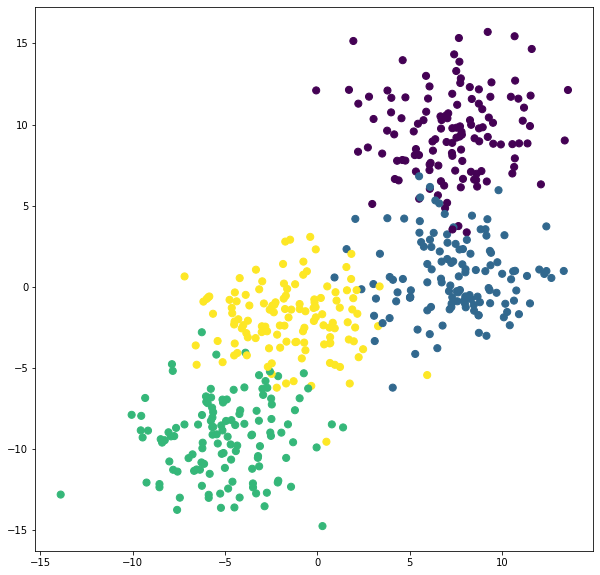

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=50)

In [42]:
X[0,1], X[0]

(1.0768464734786272, array([8.031223  , 1.07684647]))

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# 決定木を描画するための関数
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    決定木の可視化をします。
    INPUTS: 分類モデル, X, y, optional x/y limits.
    OUTPUTS: Meshgridを使った決定木の可視化
    '''
    # fitを使ったモデルの構築
    classifier.fit(X, y)
    
    # 軸を自動調整
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # meshgridをつくります。
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 分類器の予測をZとして保存
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # meshgridを使って、整形します。
    Z = Z.reshape(xx.shape)
    
    # 分類ごとに色を付けます。
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # 訓練データも描画します。
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        境界線を描き込みます。
        '''
        if i < 0:
            return

        tree = classifier.tree_
        
        # 境界を描画するために、再帰的に呼び出します。
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [34]:
# 決定木の深さが2
cls = DecisionTreeClassifier(max_depth=2, random_state=0)

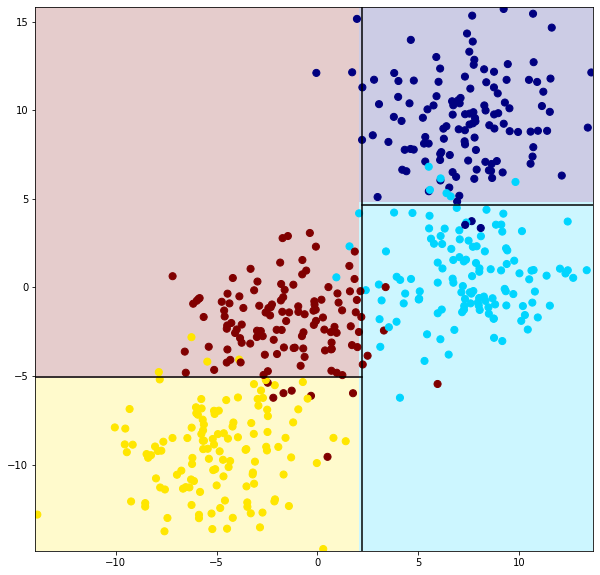

In [35]:
visualize_tree(cls, X, y)

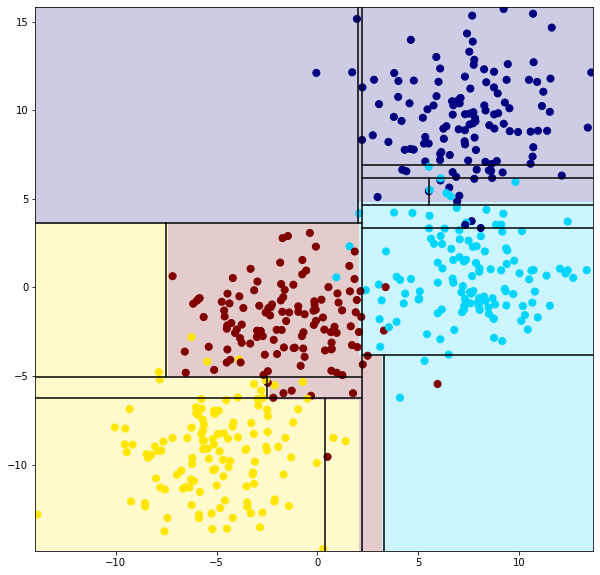

In [43]:
# 決定木の深さが4
cls = DecisionTreeClassifier(max_depth=4, random_state=0)
visualize_tree(cls, X, y)

In [48]:
from sklearn.ensemble import RandomForestClassifier


In [49]:
# 作る決定木の数をn_estimatorsで決める
clf = RandomForestClassifier(n_estimators=100, random_state=0)

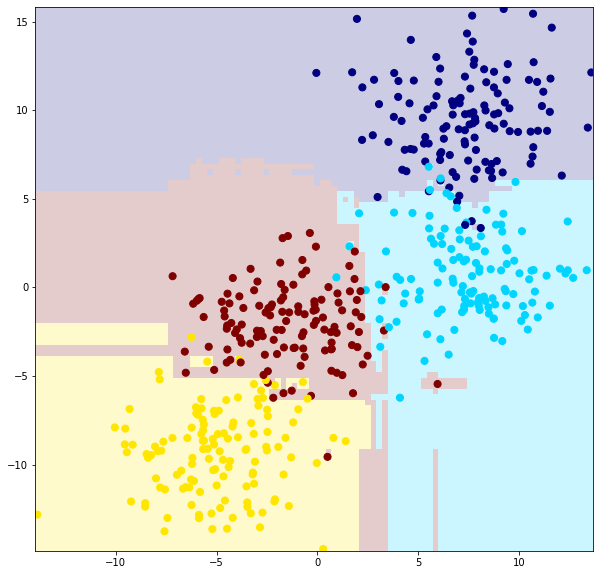

In [53]:
visualize_tree(clf,X,y,boundaries=False)
# 決定木よりも性能よく分類することが出来る

In [54]:
from sklearn.ensemble import RandomForestRegressor

<ErrorbarContainer object of 3 artists>

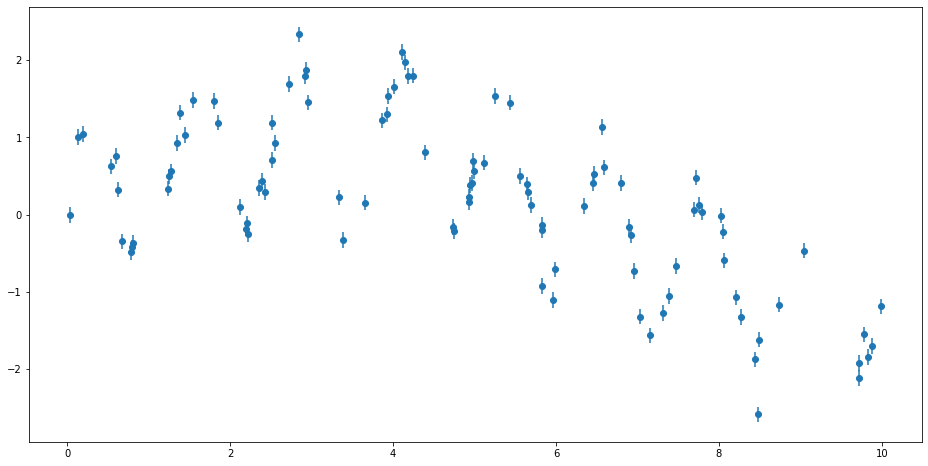

In [55]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    大きな波＋小さな波＋ノイズからなるダミーデータです。
    大きな波:np.sin(5 * x)
    小さな:  np.sin(0.5 * x)
    ノイズ : noise = sigma * np.random.randn(len(x))
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# xからyを計算
y = sin_model(x)

# Plotします。
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

<ErrorbarContainer object of 3 artists>

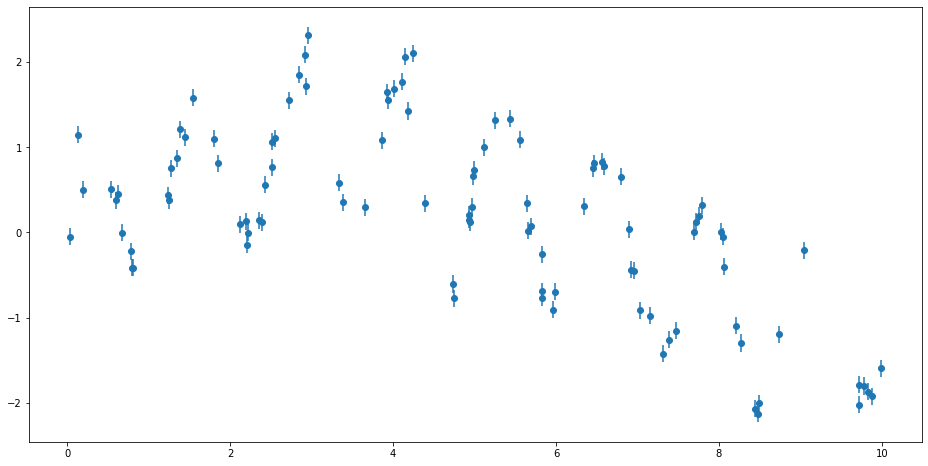

In [61]:
y = sin_model(x)
plt.figure(figsize = (16,8))
plt.errorbar(x ,y, 0.1, fmt='o')

In [64]:
xfit = np.linspace(0, 10, 1000)

In [66]:
# ランダムフォレストでの回帰モデル
rfr = RandomForestRegressor(100)

In [67]:
rfr.fit(x[:, None], y)

RandomForestRegressor()

In [69]:
# 予測値を出す
yfit = rfr.predict(xfit[:, None])
yfit

array([ 0.26131433,  0.26131433,  0.26131433,  0.26131433,  0.26131433,
        0.26131433,  0.26131433,  0.26131433,  0.26131433,  0.77484111,
        0.77484111,  0.84105214,  0.84105214,  0.84105214,  0.84105214,
        0.84105214,  0.84105214,  0.63545542,  0.63545542,  0.63545542,
        0.63545542,  0.63545542,  0.63545542,  0.63545542,  0.63545542,
        0.63545542,  0.63545542,  0.63545542,  0.63545542,  0.6744657 ,
        0.6744657 ,  0.6744657 ,  0.69164568,  0.69164568,  0.59610188,
        0.59610188,  0.59610188,  0.53674724,  0.51596903,  0.51596903,
        0.50007536,  0.4396271 ,  0.4396271 ,  0.4396271 ,  0.4396271 ,
        0.4396271 ,  0.4396271 ,  0.4396271 ,  0.4396271 ,  0.43238184,
        0.43238184,  0.43238184,  0.43238184,  0.43238184,  0.43238184,
        0.43238184,  0.43238184,  0.39148903,  0.38202882,  0.38202882,
        0.38202882,  0.36849343,  0.36849343,  0.36849343,  0.32240432,
        0.14904161,  0.14904161,  0.14174103,  0.14174103,  0.14

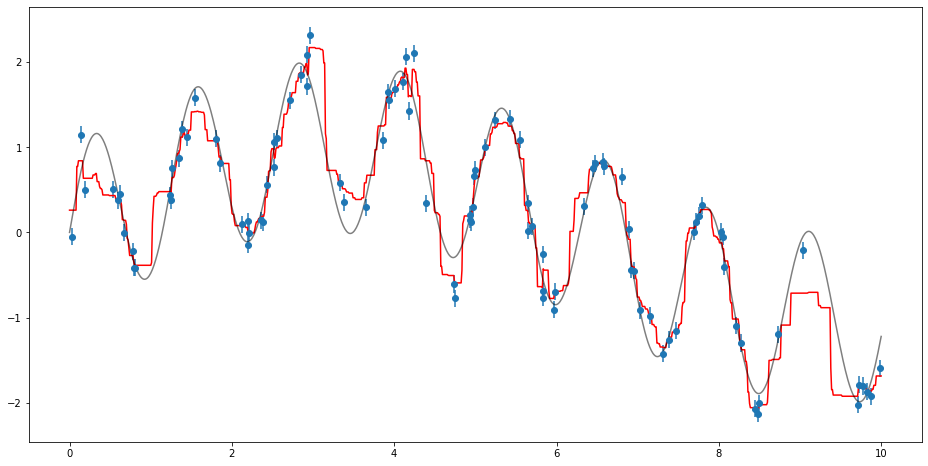

In [77]:
ytrue = sin_model(xfit,0)

plt.figure(figsize = (16,8))
plt.errorbar(x ,y, 0.1, fmt='o')
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5)